# ***EXPLAINABLE AI***
## This script is used to explainability and interpretabilty

In [16]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import export_text
from sklearn.inspection import PartialDependenceDisplay, permutation_importance
from sklearn.preprocessing import LabelEncoder
import shap

In [17]:
# Load your model
model = joblib.load('C:\\Users\\202207760\\Desktop\\Capstone Project webpage\\Loan-Default-Predictor-main\\DeploymentModel.joblib')

In [18]:
# Load your training data
data_path = 'C:\\Users\\202207760\\Desktop\\Capstone Project webpage\\Loan-Default-Predictor-main\\Loan_default.csv'
data = pd.read_csv(data_path)

In [19]:
# Define your features
features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines',
            'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
            'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
target = 'Default'

In [20]:
X_train = data[features]
y_train = data[target]

In [21]:
# Take 10% of the data
X_train = X_train.sample(frac=0.1, random_state=42)
y_train = y_train.loc[X_train.index]

In [22]:
# Label encode categorical features
label_encoder = LabelEncoder()
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose', 'HasMortgage', 'HasDependents', 'HasCoSigner']

In [23]:
for feature in categorical_features:
    X_train[feature] = label_encoder.fit_transform(X_train[feature])

In [24]:
# 1. Feature Importance
importances = model.feature_importances_
indices = pd.Series(importances, index=features).sort_values(ascending=False)

In [25]:
plt.figure(figsize=(12, 6))
indices.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Adjust layout for better visibility
plt.tight_layout()

plt.savefig('feature_importance.png')
plt.close()


In [26]:
# 2. Decision Paths for Individual Predictions
for i, tree in enumerate(model.estimators_[:3]):  # Show the first 3 trees for example
    tree_rules = export_text(tree, feature_names=features)
    print(f"Tree {i}:\n{tree_rules}\n")

Tree 0:
|--- Age <= 42.50
|   |--- Income <= 35586.50
|   |   |--- Age <= 28.50
|   |   |   |--- InterestRate <= 12.62
|   |   |   |   |--- LoanAmount <= 89517.00
|   |   |   |   |   |--- MonthsEmployed <= 18.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- CreditScore <= 547.00
|   |   |   |   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |   |   |   |--- LoanTerm <= 54.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- LoanTerm >  54.00
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Age >  20.50
|   |   |   |   |   |   |   |   |   |--- LoanAmount <= 33727.00
|   |   |   |   |   |   |   |   |   |   |--- LoanTerm <= 30.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- LoanTerm >  30.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |

In [27]:
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
perm_indices = pd.Series(perm_importance.importances_mean, index=features).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
perm_indices.plot(kind='bar')
plt.title('Permutation Feature Importances')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.savefig('perm_feature_importance.png')
plt.close()

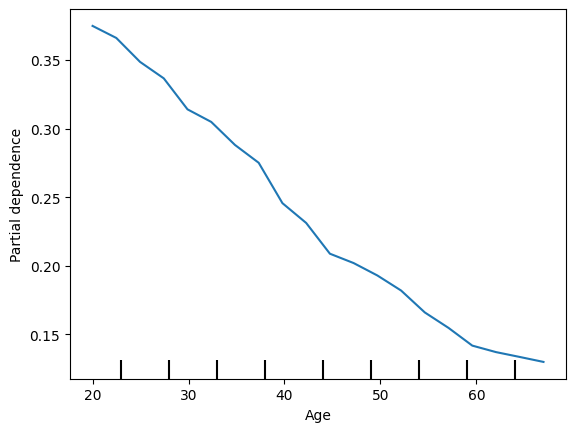

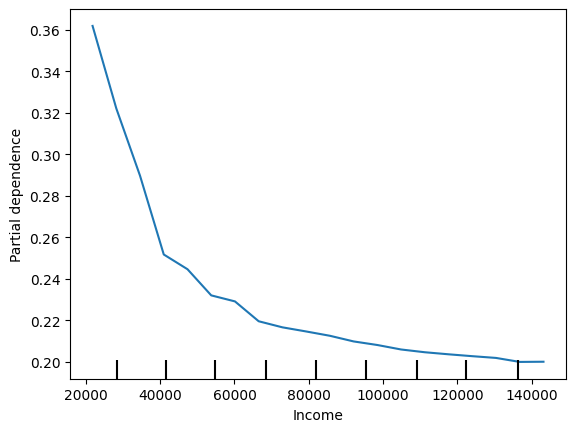

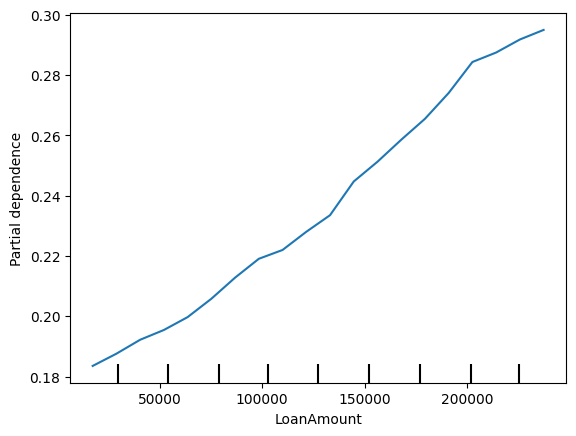

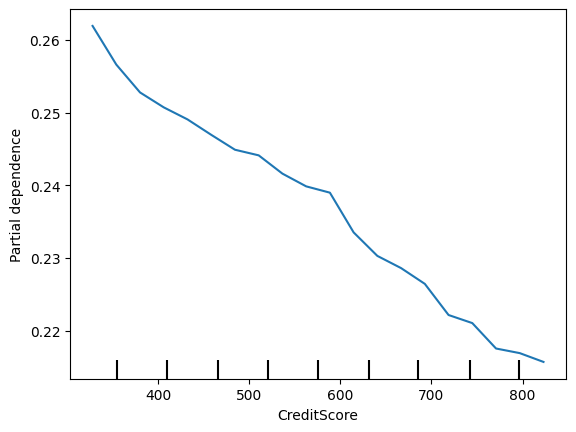

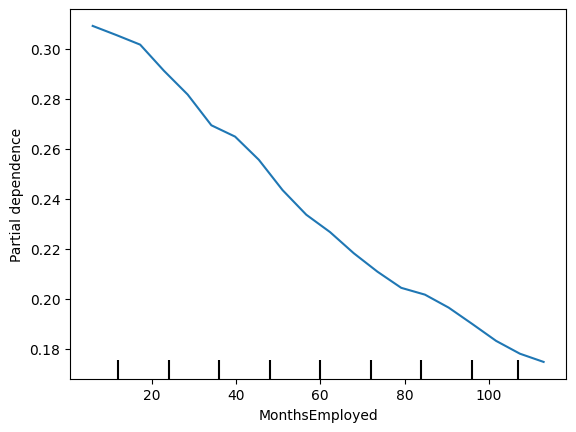

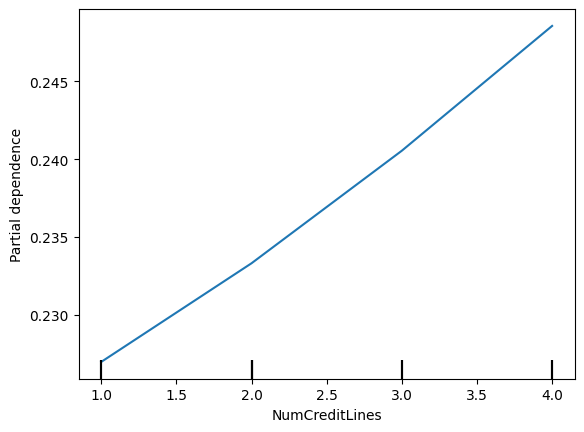

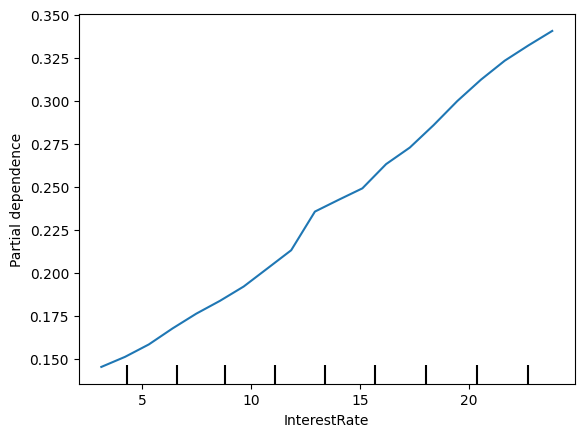

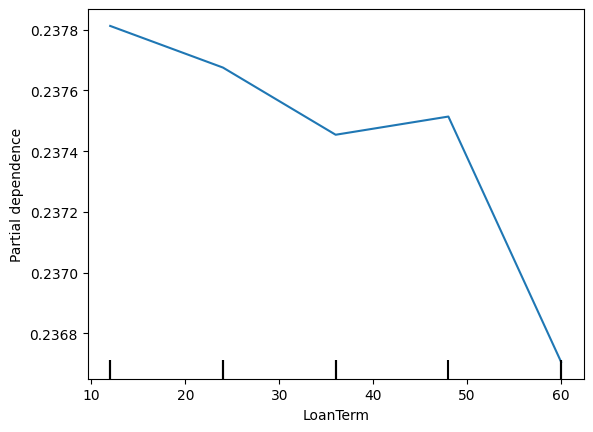

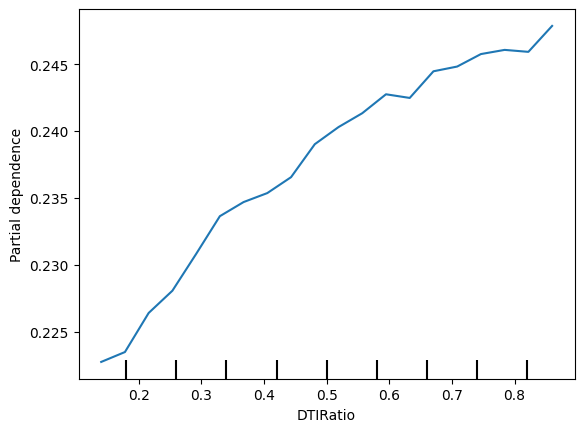

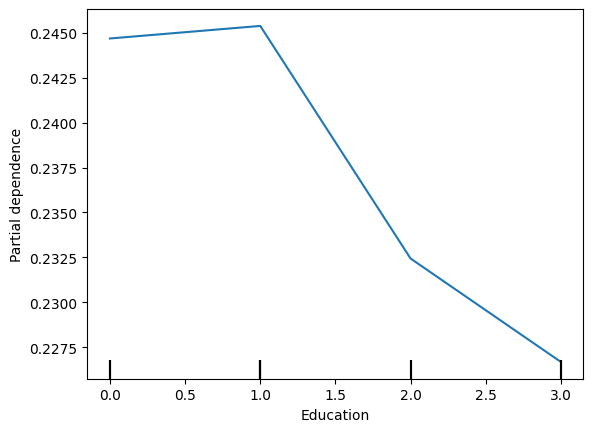

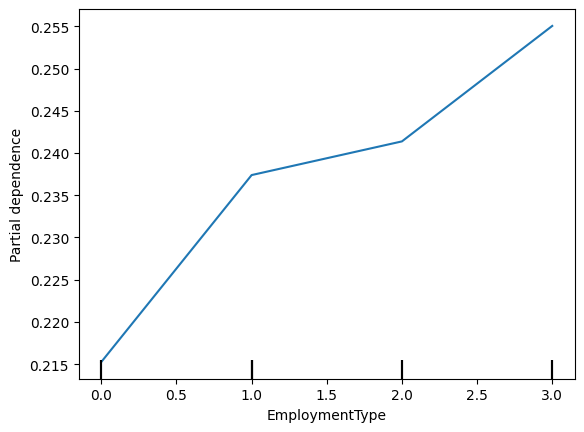

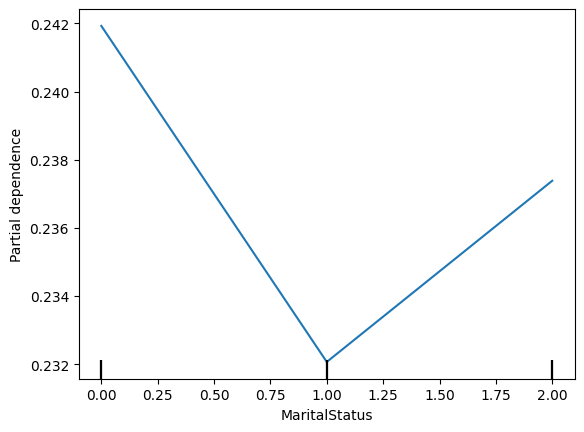

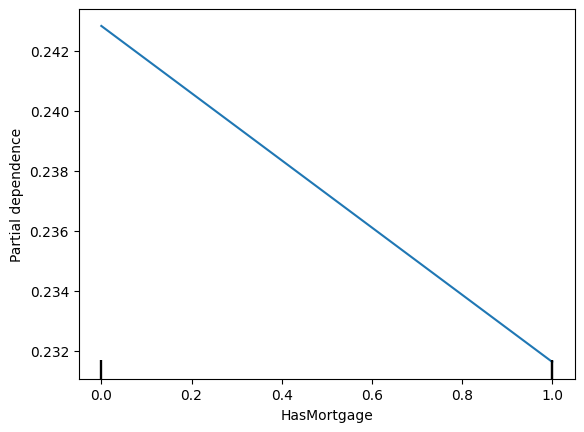

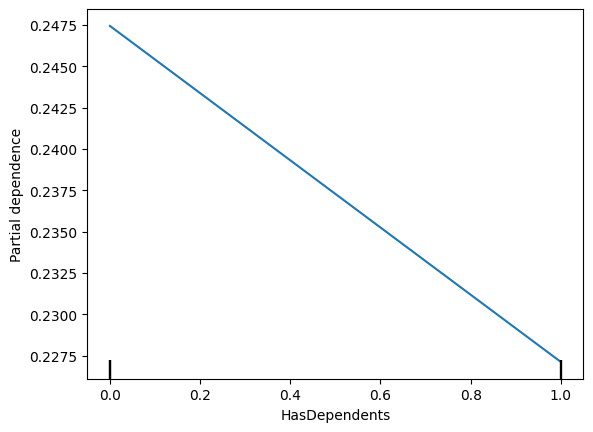

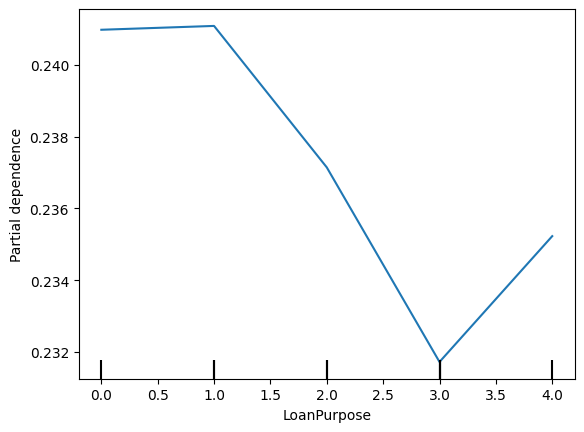

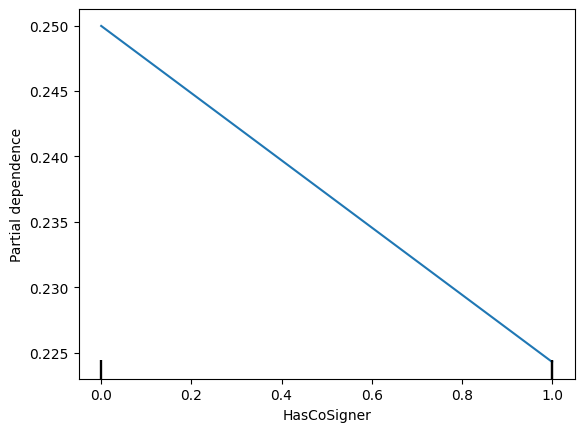

In [28]:
# 4. Partial Dependence Plots (PDPs) for each feature
for feature in features:
    display = PartialDependenceDisplay.from_estimator(model, X_train, [feature], grid_resolution=20)
    fig, ax = plt.subplots(figsize=(12, 6))
    display.plot(ax=ax)
    plt.title(f'Partial Dependence Plot for {feature}')
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.savefig(f'partial_dependence_plot_{feature}.png')
    plt.close()